### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Import and preview data

In [2]:
pokemon = pd.read_csv('/mnt/pokemon.csv')
pokemon.set_index('Name',inplace = True)
pokemon.loc[pokemon['Type 2'].isna(),'Type 2'] = "None"
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,None,309,39,52,43,60,50,65,1,False


#### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
pred_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed'] # must be continuous for KNN
target_col = 'Legendary'

X = pokemon[pred_cols]
y = pokemon[target_col]

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.20,random_state=7,stratify=y)

In [85]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [88]:
ypred = knn.predict(Xtest)
print(knn.score(Xtest,ytest))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.95625
[[147   0]
 [  7   6]]
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       147
        True       1.00      0.46      0.63        13

    accuracy                           0.96       160
   macro avg       0.98      0.73      0.80       160
weighted avg       0.96      0.96      0.95       160



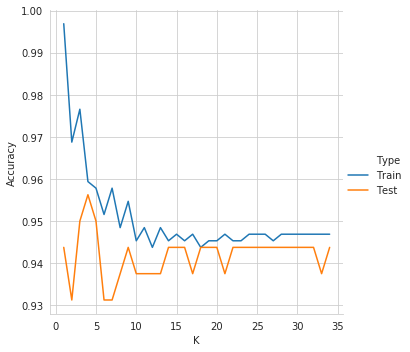

In [32]:
neighbors = np.arange(1,35)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain,ytrain)
    
    train_accuracy[i] = knn.score(Xtrain, ytrain)
    test_accuracy[i] = knn.score(Xtest, ytest)

df_train = pd.DataFrame({'Type':['Train' for i in neighbors],'K':neighbors,'Accuracy':train_accuracy})
df_test = pd.DataFrame({'Type':['Test' for i in neighbors],'K':neighbors,'Accuracy':test_accuracy})
df = pd.concat([df_train, df_test])

sns.relplot(data=df,x='K',y='Accuracy',hue='Type',kind='line')

### Linear regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
keep_cols = ['HP', 'Defense','Spec_Attack', 'Spec_Def', 'Speed', 'Legendary']
target_col = 'Attack'

X = pokemon[keep_cols]
y = pokemon[[target_col]] # Ensures y is an n x 1 vector, not an n x NULL vector

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.20,random_state=7)

In [60]:
reg = LinearRegression()
reg.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
ypred = reg.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
r2 = reg.score(Xtest,ytest)

In [58]:
print("R^2: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.32178177321898405
Root Mean Squared Error: 24.876872111581402


### Cross-validation on Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [66]:
keep_cols = ['HP', 'Defense','Spec_Attack', 'Spec_Def', 'Speed', 'Legendary']
target_col = 'Attack'

X = pokemon[keep_cols]
y = pokemon[[target_col]] # Ensures y is an n x 1 vector, not an n x NULL vector

In [68]:
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y,cv=5)

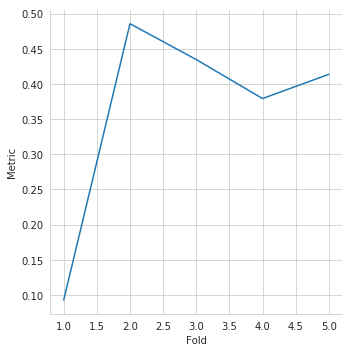

In [75]:
df = pd.DataFrame({'Fold':np.arange(1,len(cv_results)+1),'Metric':cv_results})
sns.relplot(data=df,x='Fold',y='Metric',kind='line',markers=True)

### LASSO

In [76]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

In [77]:
keep_cols = ['HP', 'Defense','Spec_Attack', 'Spec_Def', 'Speed', 'Legendary']
target_col = 'Attack'

X = pokemon[keep_cols]
y = pokemon[[target_col]] # Ensures y is an n x 1 vector, not an n x NULL vector

In [78]:
lasso = Lasso(alpha=0.1,normalize=True)
lasso.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

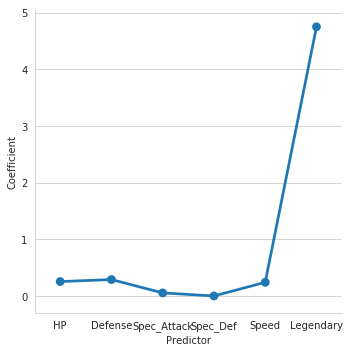

In [81]:
df = pd.DataFrame({'Predictor':keep_cols,'Coefficient':lasso.coef_})
sns.catplot(data=df,x='Predictor',y='Coefficient',kind='point')

### Logistic Regression with ROC

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
pred_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed'] 
target_col = 'Legendary'

X = pokemon[pred_cols]
y = pokemon[target_col]

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.20,random_state=7,stratify=y)

In [8]:
logreg = LogisticRegression()
logreg.fit(Xtrain,ytrain)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
ypred_p = logreg.predict_proba(Xtest)[:,1]

In [19]:
fpr, tpr, thresholds = roc_curve(ytest,ypred_p)
roc_auc_score(ytest,ypred_p)

0.9599686028257457

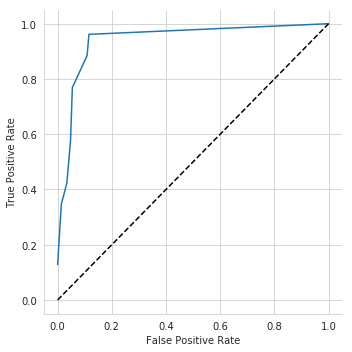

In [16]:
df = pd.DataFrame({'False Positive Rate':fpr,'True Positive Rate':tpr})
sns.relplot(data=df,x='False Positive Rate',y='True Positive Rate',kind='line',ci=None)
plt.plot([0,1],[0,1],'k--')

In [21]:
cv_scores = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

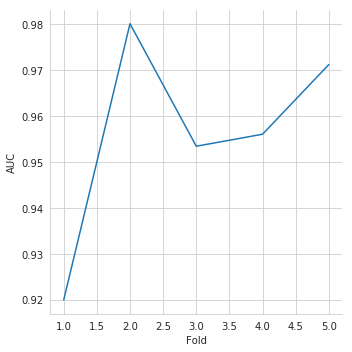

In [23]:
df = pd.DataFrame({'Fold':np.arange(1,len(cv_scores)+1),'AUC':cv_scores})
sns.relplot(data=df,x='Fold',y='AUC',kind='line',markers=True)

### Hyperparameter Tuning

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
pred_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed'] # must be continuous for KNN
target_col = 'Legendary'

X = pokemon[pred_cols]
y = pokemon[target_col]

In [26]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [29]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 32}
0.945


### Decision Tree with Random Search

In [3]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
pokemon = pd.read_csv('/mnt/pokemon.csv')
pokemon.set_index('Name',inplace = True)
pokemon.loc[pokemon['Type 2'].isna(),'Type 2'] = "None"
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,None,309,39,52,43,60,50,65,1,False


In [6]:
pred_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed'] 
target_col = 'Legendary'

X = pokemon[pred_cols]
y = pokemon[target_col]

In [10]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(pred_cols)),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [11]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist,cv=5)
tree_cv.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [14]:
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 6}
0.93375


### Performing CV and then prediction on hold-out set (Logistic Regression)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

In [16]:
pokemon = pd.read_csv('/mnt/pokemon.csv')
pokemon.set_index('Name',inplace = True)
pokemon.loc[pokemon['Type 2'].isna(),'Type 2'] = "None"
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,None,309,39,52,43,60,50,65,1,False


In [35]:
pred_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed'] 
target_col = 'Legendary'

X = pokemon[pred_cols]
y = pokemon[target_col]

In [36]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1','l2']}

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4,random_state=42,stratify=y)

In [47]:
logreg = LogisticRegression(solver='liblinear',max_iter=500)
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['

In [48]:
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9520833333333333


### Cross-validation for gridsearch, then predict holdout (ElasticNet)

In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

In [52]:
pokemon = pd.read_csv('/mnt/pokemon.csv')
pokemon.set_index('Name',inplace = True)
pokemon.loc[pokemon['Type 2'].isna(),'Type 2'] = "None"
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,None,309,39,52,43,60,50,65,1,False


In [53]:
keep_cols = ['HP', 'Defense','Spec_Attack', 'Spec_Def', 'Speed', 'Legendary']
target_col = 'Attack'

X = pokemon[keep_cols]
y = pokemon[[target_col]] # Ensures y is an n x 1 vector, not an n x NULL vector

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.4,random_state=42)

In [57]:
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

In [69]:
elasticnet = ElasticNet(max_iter=1000)
gm_cv = GridSearchCV(elasticnet,param_grid,cv=5)
gm_cv.fit(Xtrain,ytrain)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109938.23991013409, tolerance: 37.55280390625
  positive)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111577.08493378166, tolerance: 38.11262473958333
  positive)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109556.2300869852, tolerance: 38.0225625
  positive)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [81]:
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.4516539040735645
Tuned ElasticNet MSE: 618.430033733696


### Categorical Predictors

In [82]:
pokemon = pd.read_csv('/mnt/pokemon.csv')
pokemon.set_index('Name',inplace = True)
pokemon.loc[pokemon['Type 2'].isna(),'Type 2'] = "None"
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,None,309,39,52,43,60,50,65,1,False


In [94]:
pokemon_design = pd.get_dummies(pokemon,columns=['Type 1','Type 2','Generation']) # drop_first=True removes first group
pokemon_design = pokemon_design.drop(['Type 1_Normal','Type 2_Normal','Generation_1'],axis=1) # Choose baseline groups
pokemon_design.columns

Index(['Number', 'Total', 'HP', 'Attack', 'Defense', 'Spec_Attack', 'Spec_Def',
       'Speed', 'Legendary', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon',
       'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire',
       'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground',
       'Type 1_Ice', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock',
       'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark',
       'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting',
       'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass',
       'Type 2_Ground', 'Type 2_Ice', 'Type 2_None', 'Type 2_Poison',
       'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water',
       'Generation_2', 'Generation_3', 'Generation_4', 'Generation_5',
       'Generation_6'],
      dtype='object')

### Missing Data

In [137]:
from sklearn.preprocessing import Imputer

In [138]:
pokemon = pd.read_csv('/mnt/pokemon.csv')
pokemon.set_index('Name',inplace = True)
pokemon['Type 2'].replace(np.nan,'None',inplace=True)
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,None,309,39,52,43,60,50,65,1,False


In [143]:
pokemon_design = pd.get_dummies(pokemon,columns=['Type 1','Type 2','Generation']) 
pokemon_design = pokemon_design.drop(['Type 1_Normal','Type 2_Normal','Generation_1'],axis=1) # Choose baseline groups

In [139]:
row_miss = ['Bulbasaur','Charizard','Lapras','Psyduck','Nidoking','Nidoqueen','Charmander','Zapdos']
col_miss = ['Defense','HP']

In [144]:
pokemon_miss = pokemon_design.copy()
pokemon_miss.loc[row_miss,col_miss] = 0
pokemon_miss.loc[row_miss,:].head(n=10)

,Number,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Legendary,Type 1_Bug,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,318,0,49,0,65,65,45,False,0,...,1,0,0,0,0,0,0,0,0,0
Charizard,6,534,0,84,0,109,85,100,False,0,...,0,0,0,0,0,0,0,0,0,0
Lapras,131,535,0,85,0,85,95,60,False,0,...,0,0,0,0,0,0,0,0,0,0
Psyduck,54,320,0,52,0,65,50,55,False,0,...,0,0,0,0,0,0,0,0,0,0
Nidoking,34,505,0,102,0,85,75,85,False,0,...,0,0,0,0,0,0,0,0,0,0
Nidoqueen,31,505,0,92,0,75,85,76,False,0,...,0,0,0,0,0,0,0,0,0,0
Charmander,4,309,0,52,0,60,50,65,False,0,...,0,0,0,0,0,0,0,0,0,0
Zapdos,145,580,0,90,0,125,90,100,True,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
pokemon_miss['Defense'].replace(0,np.nan,inplace=True)
pokemon_miss['HP'].replace(0,np.nan,inplace=True)
pokemon_miss.loc[row_miss].head(n=10)

,Number,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Legendary,Type 1_Bug,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,318,NaN,49,NaN,65,65,45,False,0,...,1,0,0,0,0,0,0,0,0,0
Charizard,6,534,NaN,84,NaN,109,85,100,False,0,...,0,0,0,0,0,0,0,0,0,0
Lapras,131,535,NaN,85,NaN,85,95,60,False,0,...,0,0,0,0,0,0,0,0,0,0
Psyduck,54,320,NaN,52,NaN,65,50,55,False,0,...,0,0,0,0,0,0,0,0,0,0
Nidoking,34,505,NaN,102,NaN,85,75,85,False,0,...,0,0,0,0,0,0,0,0,0,0
Nidoqueen,31,505,NaN,92,NaN,75,85,76,False,0,...,0,0,0,0,0,0,0,0,0,0
Charmander,4,309,NaN,52,NaN,60,50,65,False,0,...,0,0,0,0,0,0,0,0,0,0
Zapdos,145,580,NaN,90,NaN,125,90,100,True,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
imp.fit(pokemon_miss)
pokemon_mean = pd.DataFrame(imp.transform(pokemon_miss),columns=pokemon_miss.columns,index=pokemon_miss.index)
pokemon_mean.loc[row_miss].head(n=10)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Number,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Legendary,Type 1_Bug,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.0,318.0,69.19697,49.0,73.897727,65.0,65.0,45.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Charizard,6.0,534.0,69.19697,84.0,73.897727,109.0,85.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lapras,131.0,535.0,69.19697,85.0,73.897727,85.0,95.0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Psyduck,54.0,320.0,69.19697,52.0,73.897727,65.0,50.0,55.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nidoking,34.0,505.0,69.19697,102.0,73.897727,85.0,75.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nidoqueen,31.0,505.0,69.19697,92.0,73.897727,75.0,85.0,76.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Charmander,4.0,309.0,69.19697,52.0,73.897727,60.0,50.0,65.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zapdos,145.0,580.0,69.19697,90.0,73.897727,125.0,90.0,100.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Building a Pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
pokemon = pd.read_csv('/mnt/pokemon.csv')
pokemon.set_index('Name',inplace = True)
pokemon['Type 2'].replace(np.nan,'None',inplace=True)
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,None,309,39,52,43,60,50,65,1,False


In [16]:
pokemon_design = pd.get_dummies(pokemon,columns=['Type 1','Type 2','Generation']) 
pokemon_design = pokemon_design.drop(['Type 1_Normal','Type 2_Normal','Generation_1'],axis=1) # Choose baseline groups

In [17]:
row_miss = ['Bulbasaur','Charizard','Lapras','Psyduck','Nidoking','Nidoqueen','Charmander','Zapdos']
col_miss = ['Defense','HP']

In [18]:
pokemon_miss = pokemon_design.copy()
pokemon_miss.loc[row_miss,col_miss] = np.nan
pokemon_miss.loc[row_miss,:].head(n=10)

,Number,Total,HP,Attack,Defense,Spec_Attack,Spec_Def,Speed,Legendary,Type 1_Bug,...,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,318,NaN,49,NaN,65,65,45,False,0,...,1,0,0,0,0,0,0,0,0,0
Charizard,6,534,NaN,84,NaN,109,85,100,False,0,...,0,0,0,0,0,0,0,0,0,0
Lapras,131,535,NaN,85,NaN,85,95,60,False,0,...,0,0,0,0,0,0,0,0,0,0
Psyduck,54,320,NaN,52,NaN,65,50,55,False,0,...,0,0,0,0,0,0,0,0,0,0
Nidoking,34,505,NaN,102,NaN,85,75,85,False,0,...,0,0,0,0,0,0,0,0,0,0
Nidoqueen,31,505,NaN,92,NaN,75,85,76,False,0,...,0,0,0,0,0,0,0,0,0,0
Charmander,4,309,NaN,52,NaN,60,50,65,False,0,...,0,0,0,0,0,0,0,0,0,0
Zapdos,145,580,NaN,90,NaN,125,90,100,True,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
logreg = LogisticRegression()
steps = [('imputation',imp),('logistic_regression',logreg)]
pipeline = Pipeline(steps)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
pred_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed'] 
target_col = 'Legendary'

X = pokemon[pred_cols]
y = pokemon[target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4,random_state=42,stratify=y)

In [30]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test,y_test)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9125

### Centering and Scaling

In [52]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [32]:
pred_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed'] # must be continuous for KNN
target_col = 'Legendary'

X = pokemon[pred_cols]
y = pokemon[target_col]

In [37]:
steps = [('scaling',StandardScaler()),('KNN',KNeighborsClassifier())]
pipeline = Pipeline(steps)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [39]:
knn_scaled = pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

### KNN Pipeline with centering/scaling and CV

In [42]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [43]:
pred_cols = ['HP','Attack','Defense','Spec_Attack','Spec_Def','Speed'] # must be continuous for KNN
target_col = 'Legendary'

X = pokemon[pred_cols]
y = pokemon[target_col]

In [58]:
steps = [('scaling',StandardScaler()),('knn',KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors': np.arange(1,50)}

In [61]:
cv = GridSearchCV(pipeline,param_grid=parameters,cv=5)
cv.fit(X_train,y_train)


In [63]:
y_pred = cv.predict(X_test)
print(cv.best_params_)
print(cv.best_score_)

{'knn__n_neighbors': 13}
0.9453125
